# Importação das bibliotecas e leitura dos dados

### Origem dos dados: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
### Descrição dos atributos: http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
employee_df = pd.read_csv('Human_Resources.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
employee_df.head() #ALGUMAS CATEGORIAS ESTÃO DESCRITAS NO LINK DO QUAL FOI OBTIDO OS DADOS

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Aqui observamos que não há nenhum valor nulo em nenhum atributo

In [6]:
employee_df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

# Visualização dos dados

### Primeiramente vamos transformar os atributos/classe categóricos em valores reais para uma melhor análise dos dados.

In [7]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0) #esta é a nossa classe

### Há mais dois atributos com **Yes/No**, a coluna **OverTime** e **Over18**

In [8]:
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

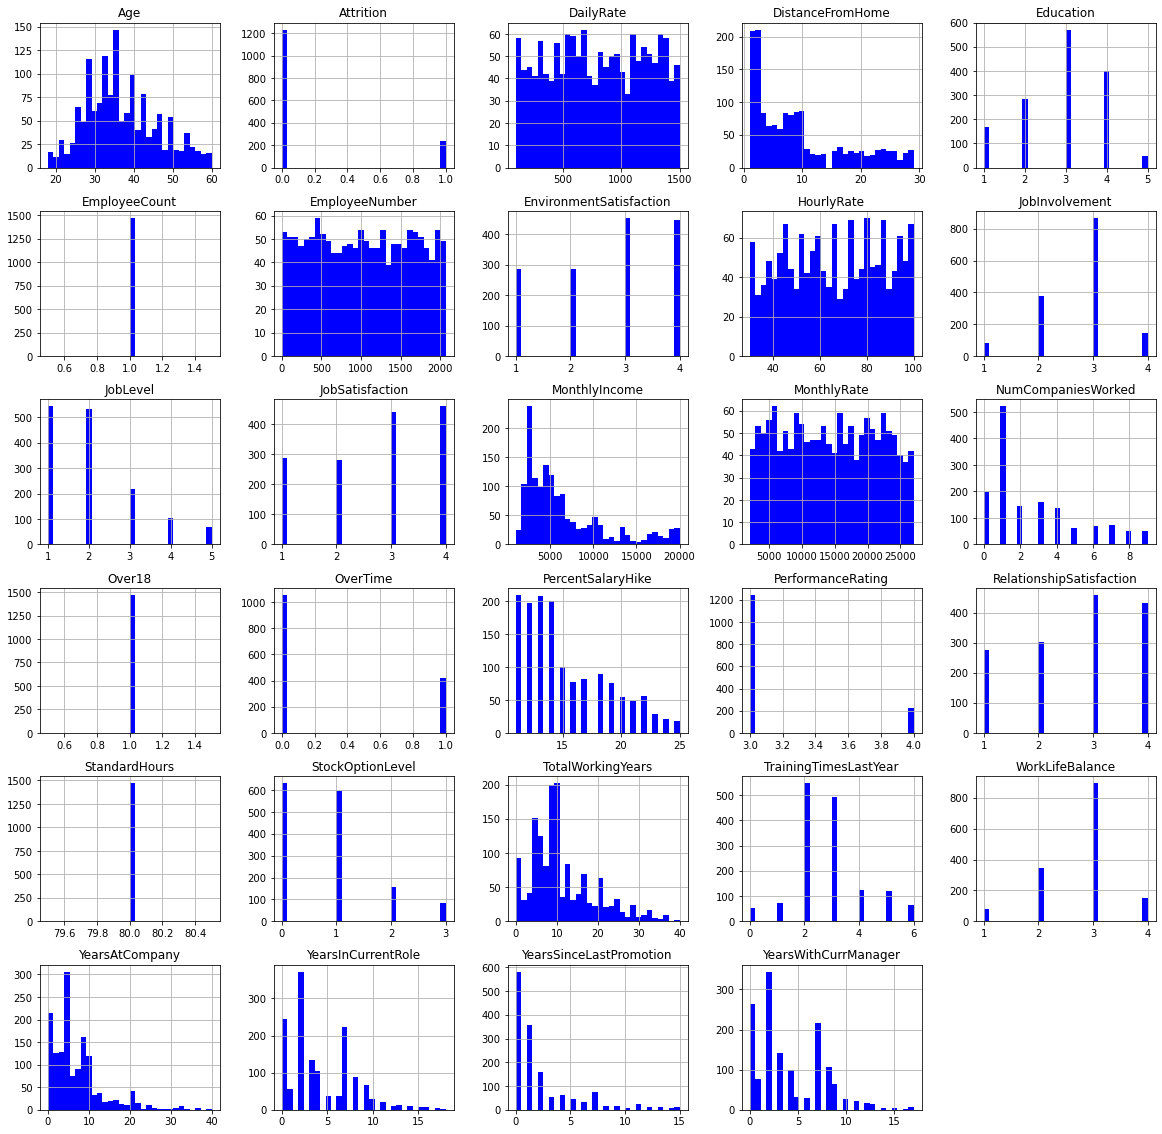

In [9]:
employee_df.hist(bins = 30, figsize = (20,20), color = 'b')
pass

### Vamos apagar os atributos que não agregam valor nenhum, como **Over18**, **StandardHours**, **EmployeeCount**, **EmployeeNumber**, pois são atributos de valor único ou atributos que não interferem na classe do problema.

In [10]:
employee_df.drop(['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber'], axis=1, inplace = True)

In [11]:
left_df = employee_df[employee_df['Attrition'] == 1]  #aqueles que sairam da empresa
stayed_df = employee_df[employee_df['Attrition'] == 0]  #aqueles que ficaram da empresa

In [12]:
print('Total = ', len(employee_df))
print('Número e porcentagem de funcionários que saíram da empresa = ', f'{len(left_df)} e', f'{(len(left_df) / len(employee_df)) * 100:.2f}%')
print('Número e porcentagem de funcionários que ficaram da empresa = ', f'{len(stayed_df)} e', f'{(len(stayed_df) / len(employee_df)) * 100:.2f}%')

Total =  1470
Número e porcentagem de funcionários que saíram da empresa =  237 e 16.12%
Número e porcentagem de funcionários que ficaram da empresa =  1233 e 83.88%


### Podemos agora olhar algumas estatísticas a respeito de cada grupo, como salário, idade, distancia de casa, etc.

In [13]:
left_df.describe()

Age  Attrition    DailyRate  DistanceFromHome   Education  \
count  237.000000      237.0   237.000000        237.000000  237.000000   
mean    33.607595        1.0   750.362869         10.632911    2.839662   
std      9.689350        0.0   401.899519          8.452525    1.008244   
min     18.000000        1.0   103.000000          1.000000    1.000000   
25%     28.000000        1.0   408.000000          3.000000    2.000000   
50%     32.000000        1.0   699.000000          9.000000    3.000000   
75%     39.000000        1.0  1092.000000         17.000000    4.000000   
max     58.000000        1.0  1496.000000         29.000000    5.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               237.000000  237.000000      237.000000  237.000000   
mean                  2.464135   65.573840        2.518987    1.637131   
std                   1.169791   20.099958        0.773405    0.940594   
min                   1.000000   31.000000        1.000000    1.000000   
25%                   1.000000   50.000000        2.000000    1.000000   
50%                   3.000000   66.000000        3.000000    1.000000   
75%                   4.000000   84.000000        3.000000    2.000000   
max                   4.000000  100.000000        4.000000    5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count       237.000000     237.000000    237.000000          237.000000   
mean          2.468354    4787.092827  14559.308017            2.940928   
std           1.118058    3640.210367   7208.153264            2.678519   
min           1.000000    1009.000000   2326.000000            0.000000   
25%           1.000000    2373.000000   8870.000000            1.000000   
50%           3.000000    3202.000000  14618.000000            1.000000   
75%           3.000000    5916.000000  21081.000000            5.000000   
max           4.000000   19859.000000  26999.000000            9.000000   

         OverTime  PercentSalaryHike  PerformanceRating  \
count  237.000000         237.000000         237.000000   
mean     0.535865          15.097046           3.156118   
std      0.499768           3.770294           0.363735   
min      0.000000          11.000000           3.000000   
25%      0.000000          12.000000           3.000000   
50%      1.000000          14.000000           3.000000   
75%      1.000000          17.000000           3.000000   
max      1.000000          25.000000           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count                237.000000        237.000000         237.000000   
mean                   2.599156          0.527426           8.244726   
std                    1.125437          0.856361           7.169204   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           3.000000   
50%                    3.000000          0.000000           7.000000   
75%                    4.000000          1.000000          10.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count             237.000000       237.000000      237.000000   
mean                2.624473         2.658228        5.130802   
std                 1.254784         0.816453        5.949984   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        1.000000   
50%                 2.000000         3.000000        3.000000   
75%                 3.000000         3.000000        7.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count          237.000000               237.000000            237.000000  
mean             2.902954                 1.945148              2.852321  
std

In [14]:
stayed_df.describe()

Age  Attrition    DailyRate  DistanceFromHome    Education  \
count  1233.000000     1233.0  1233.000000       1233.000000  1233.000000   
mean     37.561233        0.0   812.504461          8.915653     2.927007   
std       8.888360        0.0   403.208379          8.012633     1.027002   
min      18.000000        0.0   102.000000          1.000000     1.000000   
25%      31.000000        0.0   477.000000          2.000000     2.000000   
50%      36.000000        0.0   817.000000          7.000000     3.000000   
75%      43.000000        0.0  1176.000000         13.000000     4.000000   
max      60.000000        0.0  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1233.000000  1233.000000     1233.000000  1233.000000   
mean                  2.771290    65.952149        2.770479     2.145985   
std                   1.071132    20.380754        0.692050     1.117933   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count      1233.000000    1233.000000   1233.000000          1233.00000   
mean          2.778589    6832.739659  14265.779400             2.64558   
std           1.093277    4818.208001   7102.260749             2.46009   
min           1.000000    1051.000000   2094.000000             0.00000   
25%           2.000000    3211.000000   7973.000000             1.00000   
50%           3.000000    5204.000000  14120.000000             2.00000   
75%           4.000000    8834.000000  20364.000000             4.00000   
max           4.000000   19999.000000  26997.000000             9.00000   

          OverTime  PercentSalaryHike  PerformanceRating  \
count  1233.000000        1233.000000        1233.000000   
mean      0.234388          15.231144           3.153285   
std       0.423787           3.639511           0.360408   
min       0.000000          11.000000           3.000000   
25%       0.000000          12.000000           3.000000   
50%       0.000000          14.000000           3.000000   
75%       0.000000          18.000000           3.000000   
max       1.000000          25.000000           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1233.000000       1233.000000        1233.000000   
mean                   2.733982          0.845093          11.862936   
std                    1.071603          0.841985           7.760719   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          16.000000   
max                    4.000000          3.000000          38.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1233.000000      1233.000000     1233.000000   
mean                2.832928         2.781022        7.369019   
std                 1.293585         0.681907        6.096298   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        6.000000   
75%                 3.000000         3.000000       10.000000   
max                 6.000000         4.000000       37.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1233.000000              1233.000000           1233.000000  
mean             4.484185         

<AxesSubplot:>

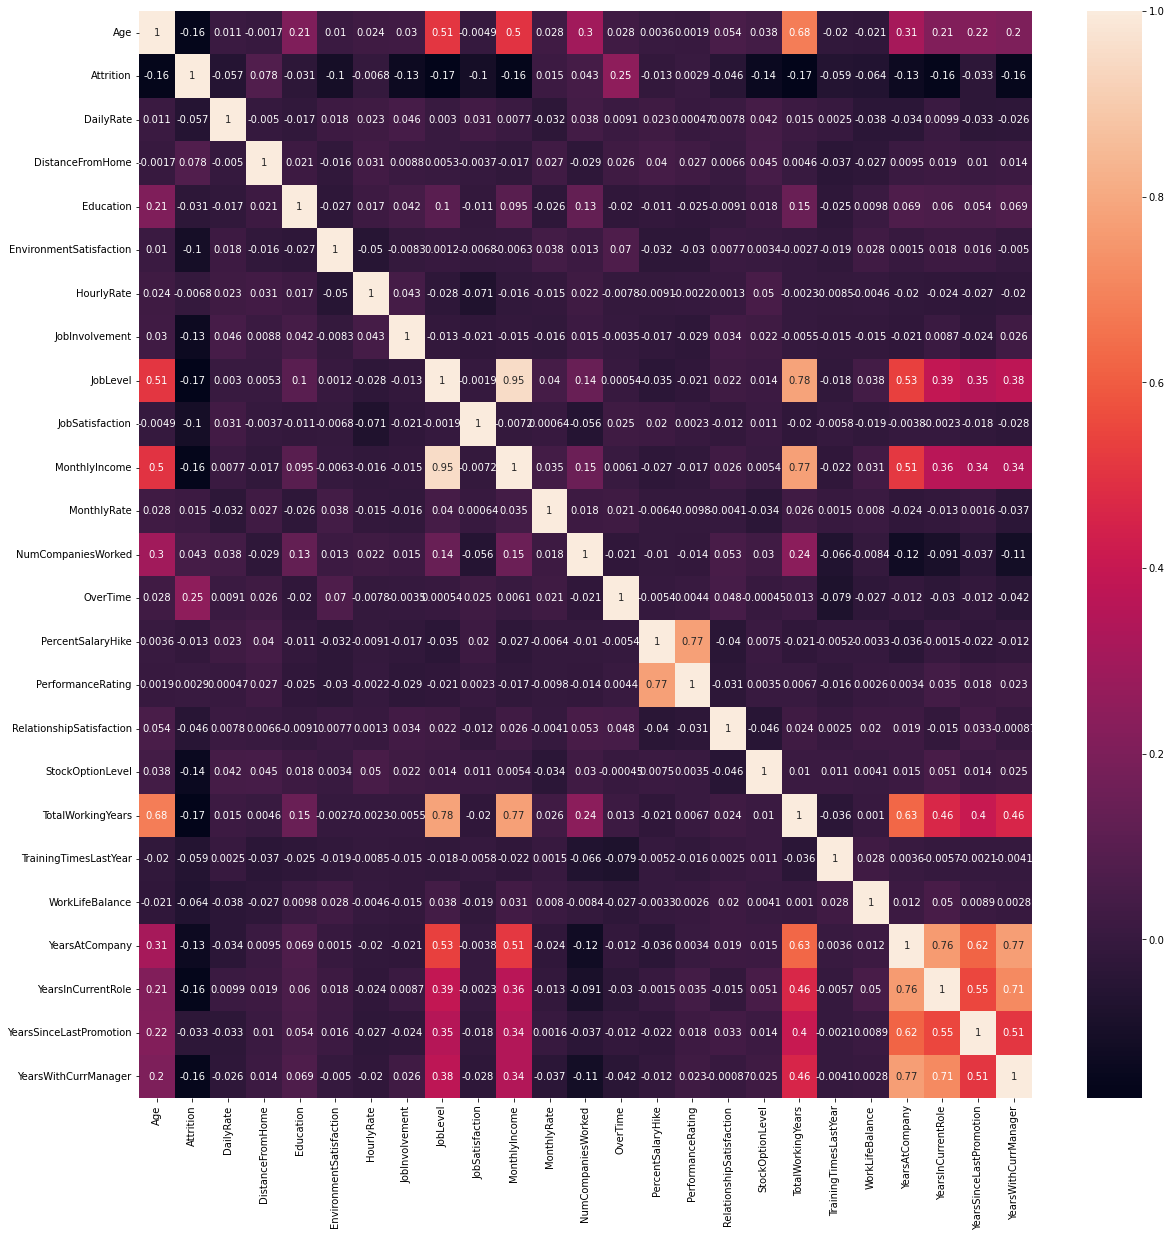

In [15]:
correlation = employee_df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation,annot = True)

### Podemos observar na matriz acima que há pares de atributos com fortes correlações, como **JobLevel/MonthlyIncome** e **JobLevel/TotalWorkingYears**, como é de se esperar

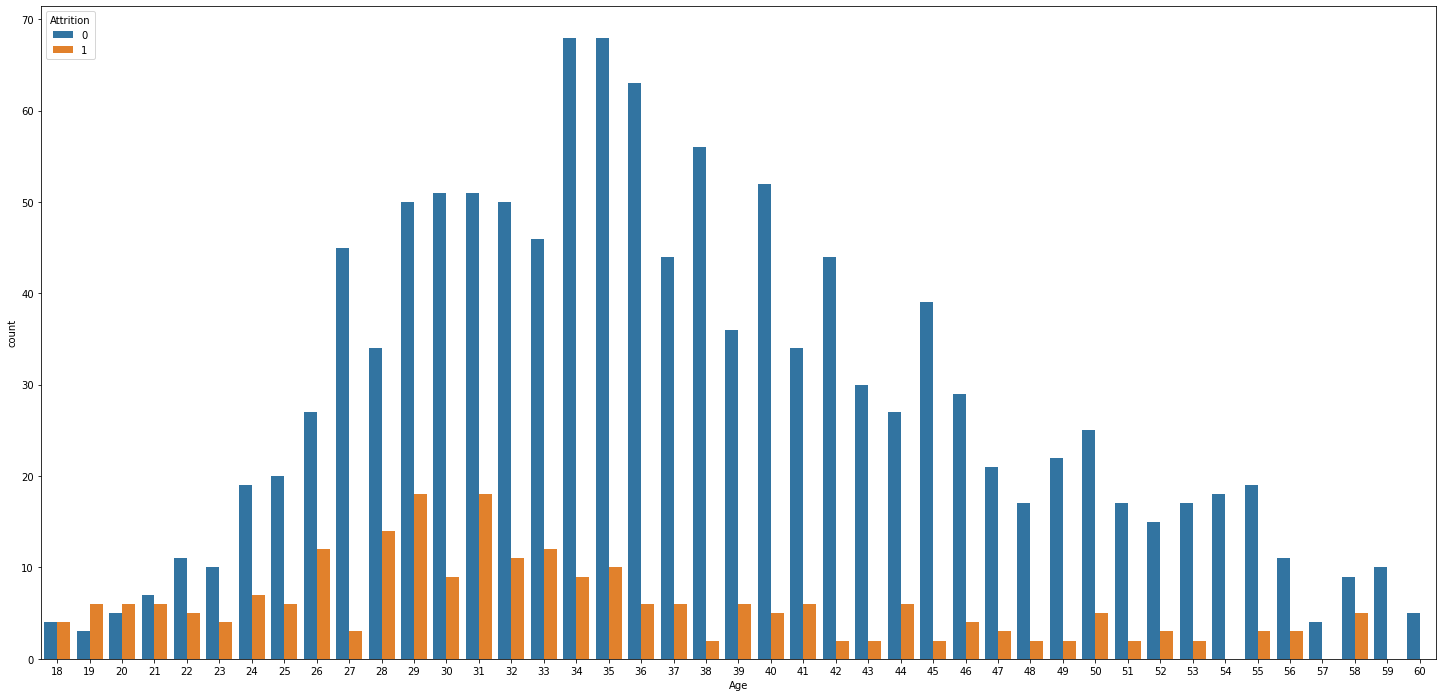

In [16]:
plt.figure(figsize=(25,12))
sns.countplot(data = employee_df, x = 'Age', hue = 'Attrition')
pass

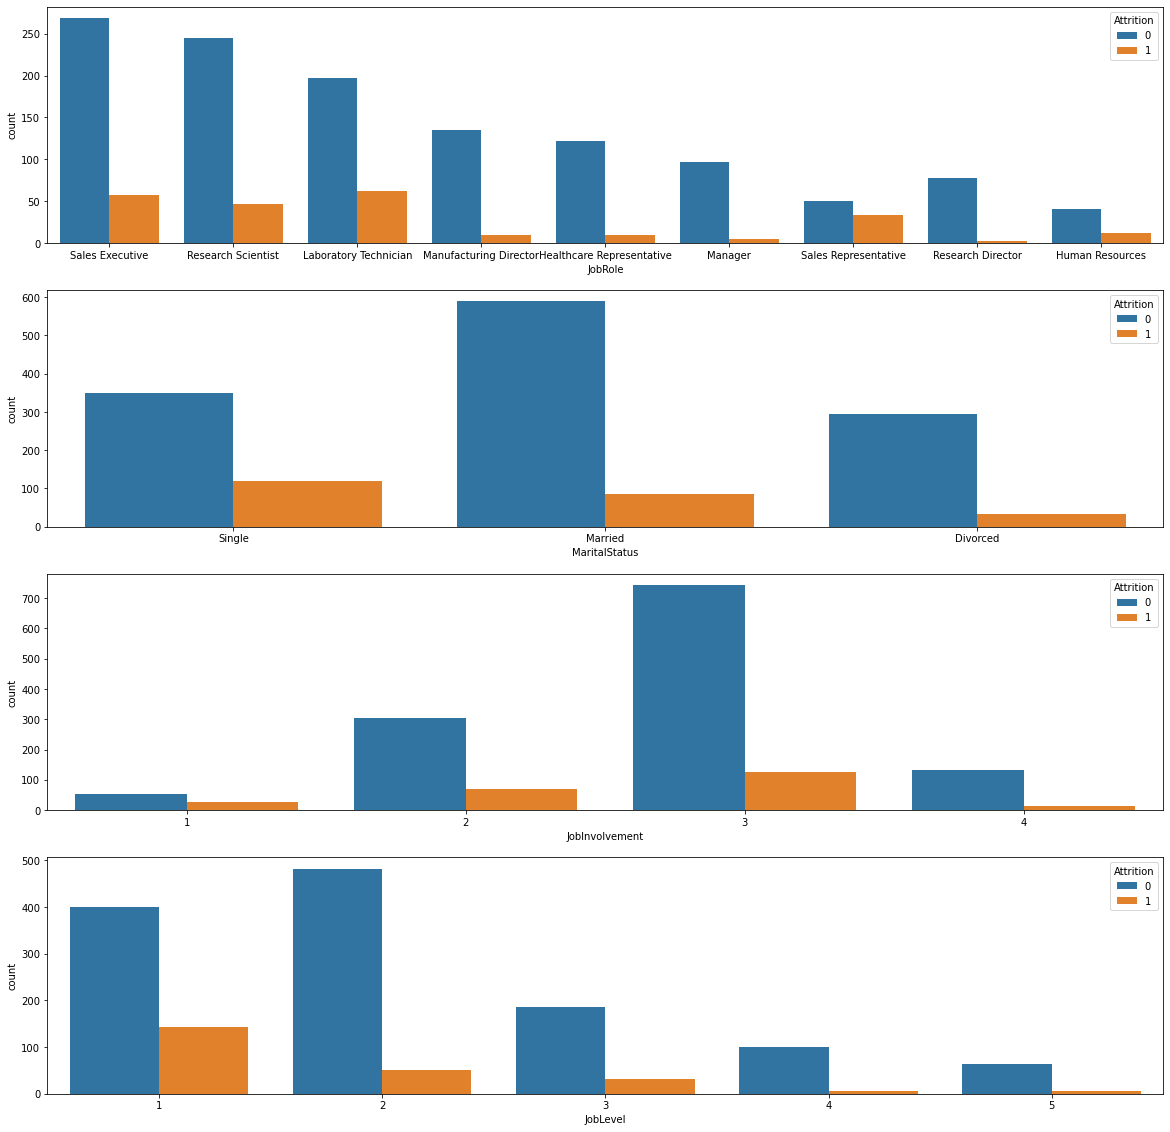

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.countplot(data = employee_df, x = 'JobRole', hue = 'Attrition')

plt.subplot(412)
sns.countplot(data = employee_df, x = 'MaritalStatus', hue = 'Attrition')

plt.subplot(413)
sns.countplot(data = employee_df, x = 'JobInvolvement', hue = 'Attrition')

plt.subplot(414)
sns.countplot(data = employee_df, x = 'JobLevel', hue = 'Attrition')

pass

### APenas com estes gráficos acima podemos inferir sobre as características daqueles que mais saem da empresa, **SalesRepresentative**, **Single**, **JobEnvolvement** = 1 (pouco envolvimento no trabalho) e **JobLevel** = 1 (Cargo mais baixo)

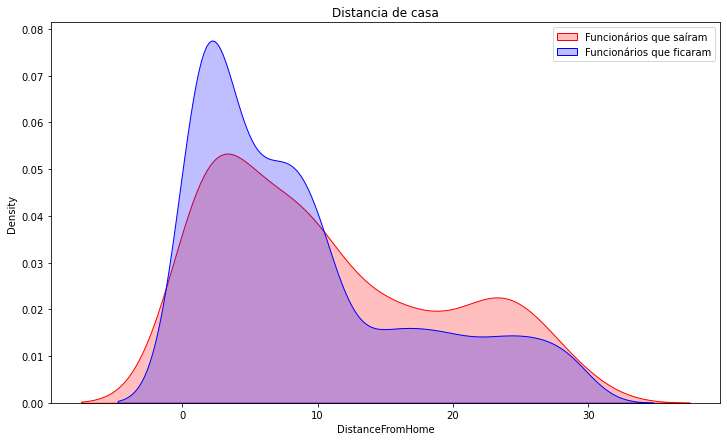

In [18]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Funcionários que ficaram', shade = True, color = 'b')
plt.legend()
plt.title('Distancia de casa')
pass

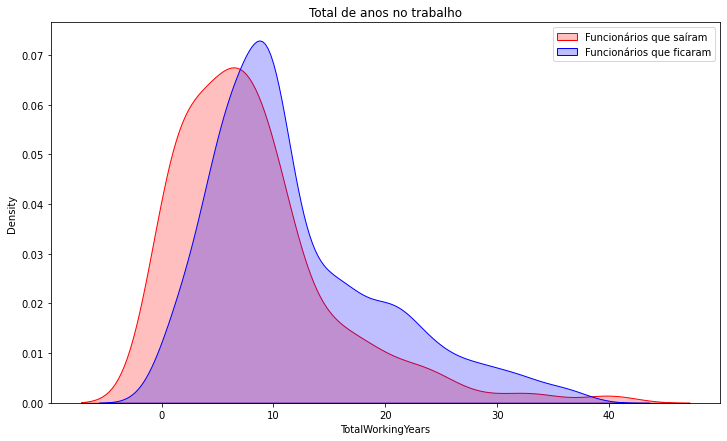

In [19]:
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Funcionários que ficaram', shade = True, color = 'b')
plt.legend()
plt.title('Total de anos no trabalho')
pass

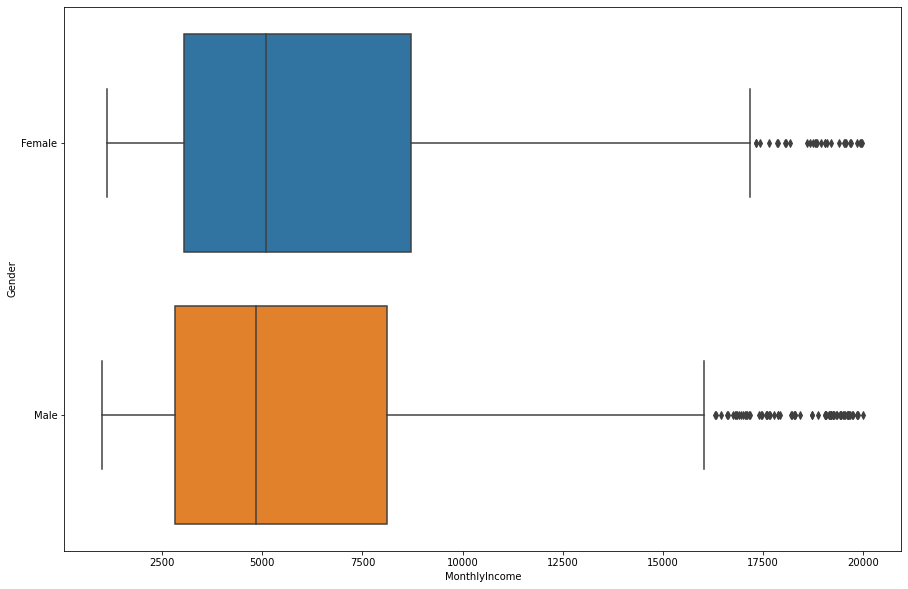

In [20]:
plt.figure(figsize=(15, 10))
bxplot = sns.boxplot(data=employee_df, x = 'MonthlyIncome', y = 'Gender')
#bxplot = sns.stripplot(data=employee_df, x = 'MonthlyIncome', y = 'Gender',marker='o', alpha=0.5, color='black')
pass

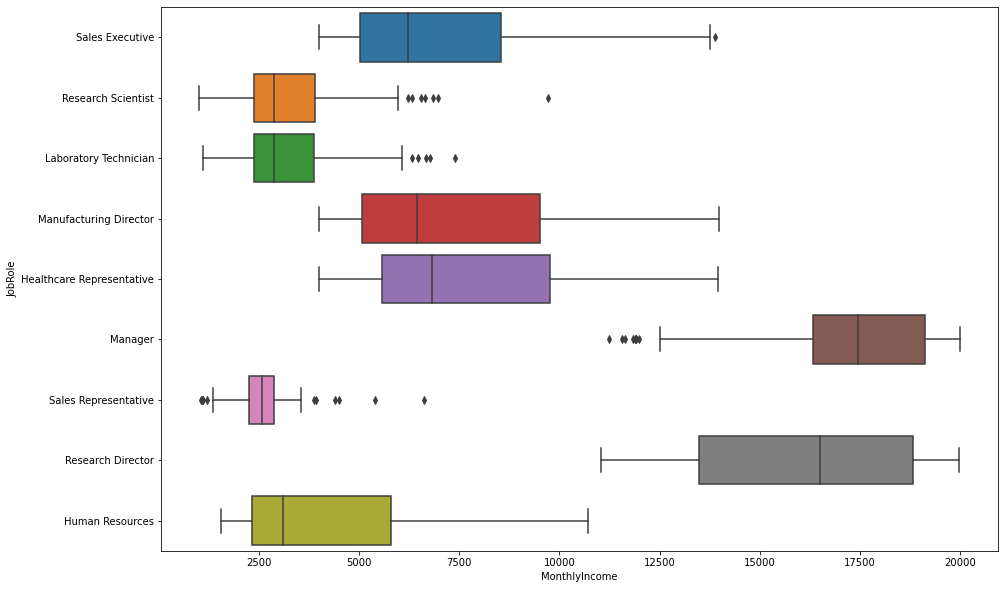

In [21]:
plt.figure(figsize=(15, 10))
bxplot = sns.boxplot(data=employee_df, x = 'MonthlyIncome', y = 'JobRole')

pass

# Pré-processamento de dados

In [22]:
employee_df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8         1                 11                  3   
1                   1         0                 23                  4   
2                   6         1                 15                  3   
3                   1         1                 11                  3   
4                   9         0                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

### Vamos aqui separar os atributos categóricos dos atributos numéricos, para tratar cada um individualmente

In [23]:
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

BusinessTravel              Department EducationField  Gender  \
0         Travel_Rarely                   Sales  Life Sciences  Female   
1     Travel_Frequently  Research & Development  Life Sciences    Male   
2         Travel_Rarely  Research & Development          Other    Male   
3     Travel_Frequently  Research & Development  Life Sciences  Female   
4         Travel_Rarely  Research & Development        Medical    Male   
...                 ...                     ...            ...     ...   
1465  Travel_Frequently  Research & Development        Medical    Male   
1466      Travel_Rarely  Research & Development        Medical    Male   
1467      Travel_Rarely  Research & Development  Life Sciences    Male   
1468  Travel_Frequently                   Sales        Medical    Male   
1469      Travel_Rarely  Research & Development        Medical    Male   

                        JobRole MaritalStatus  
0               Sales Executive        Single  
1            Research Scientist       Married  
2         Laboratory Technician        Single  
3            Research Scientist       Married  
4         Laboratory Technician       Married  
...                         ...           ...  
1465      Laboratory Technician       Married  
1466  Healthcare Representative       Married  
1467     Manufacturing Director       Married  
1468            Sales Executive       Married  
1469      Laboratory Technician       Married  

[1470 rows x 6 columns]

### Vamos agora transformar os atributos categoricos em valores numéricos, como estes atributos não possuem uma ordem de importância, vamos criar as chamadas dummy variables

In [24]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [25]:
type(X_cat)

numpy.ndarray

In [26]:
X_cat = pd.DataFrame(X_cat)

In [27]:
X_cat

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
2     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
4     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1465  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
1466  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
1467  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
1468  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
1469  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   

       14   15   16   17   18   19   20   21   22   23   24   25  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
2     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
4     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
1465  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1466  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1467  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1468  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
1469  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[1470 rows x 26 columns]

In [28]:
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36        884                23          2                        3   
1466   39        613                 6          1                        4   
1467   27        155                 4          3                        2   
1468   49       1023                 2          3                        4   
1469   34        628                 8          3                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0             94               3         2                4           5993   
1             61               2         2                2           5130   
2             92               2         1                3           2090   
3             56               3         1                3           2909   
4             40               3         1                2           3468   
...          ...             ...       ...              ...            ...   
1465          41               4         2                4           2571   
1466          42               2         3                1           9991   
1467          87               4         2                2           6142   
1468          63               2         2                2           5390   
1469          82               4         2                3           4404   

      MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  \
0           19479                   8         1                 11   
1           24907                   1         0                 23   
2            2396                   6         1                 15   
3           23159                   1         1                 11   
4           16632                   9         0                 12   
...           ...                 ...       ...                ...   
1465        12290                   4         0                 17   
1466        21457                   4         0                 15   
1467         5174                   1         1                 20   
1468        13243                   2         0                 14   
1469        10228                   2         0                 12   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...             

In [29]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)

### Para evitar que os algorítimos deem importância errônea a atributos diferentes devido aos seus valores serem diferentes, vamos passar todos para uma mesma escala, entre 0 e 1

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all) #Assim colocamos todos os atributos na mesma escala

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [31]:
y = employee_df['Attrition'] #CLasse, X são os atributos previsores

In [32]:
X = pd.DataFrame(X)

# Separação dos dados de treino e teste

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Regressão Logística

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = logistic.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test, y_pred)

0.891156462585034

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm = confusion_matrix(y_test,y_pred)

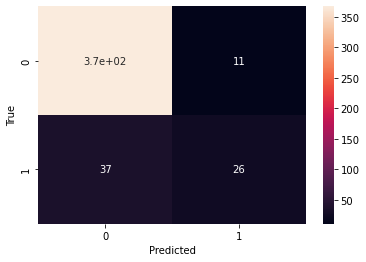

In [41]:
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')
pass

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [43]:
precision_score(y_test,y_pred)

0.7027027027027027

In [44]:
recall_score(y_test,y_pred)

0.4126984126984127

In [45]:
f1_score(y_test,y_pred, average = 'macro')

0.7293094629156011

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       378
           1       0.70      0.41      0.52        63

    accuracy                           0.89       441
   macro avg       0.81      0.69      0.73       441
weighted avg       0.88      0.89      0.88       441



## Usando a regressão logística podemos ver que há uma ótima acurácia nos dados previstos, indicando que o modelo conseguiu prever corretamente 89% dos dados de teste. Além disso, olhando a métrica 'precision', podemos constatar que o modelo, dentre as classes positivas e negativas previstas, acertou 70% e 91% respectivamente. Apesar disso, a métrica 'recall' já não possui um valor tão alto, apesar de 98% das classses negativas dos dados de teste terem sido corretamente previstos pelo modelo, a classe positiva foi corretamente prevista apenas 41%.

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred = forest.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred)

0.8798185941043084

In [51]:
cm = confusion_matrix(y_pred, y_test)

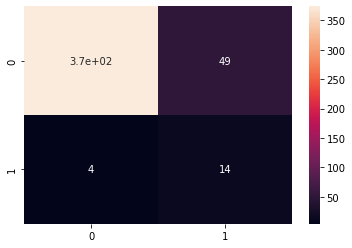

In [52]:
sns.heatmap(cm, annot = True)
pass

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       378
           1       0.78      0.22      0.35        63

    accuracy                           0.88       441
   macro avg       0.83      0.61      0.64       441
weighted avg       0.87      0.88      0.85       441



### Em comparação com o modelo de regressão logística, o modelo Random Forest mostrou um desempenho bem inferior, principalmente quando olhamos a métrica 'recall', indicando que apenas 22% das classes positivas dos dados de teste forma corretamente previstos.

# Redes Neurais Artificiais

In [54]:
import tensorflow as tf

In [55]:
rede = tf.keras.models.Sequential()
rede.add(tf.keras.layers.Dense(units=25, activation='relu', input_shape = (50,)))
rede.add(tf.keras.layers.Dense(units=25, activation='relu'))
rede.add(tf.keras.layers.Dense(units=25, activation='relu'))
rede.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [56]:
rede.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [57]:
rede.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
rede.fit(X_train, y_train, epochs=100, verbose=0)

In [59]:
y_pred = rede.predict(X_test)

14/14 [==============================] - 0s 3ms/step


In [60]:
y_pred = (y_pred >= 0.5)

In [61]:
cm = confusion_matrix(y_test, y_pred)

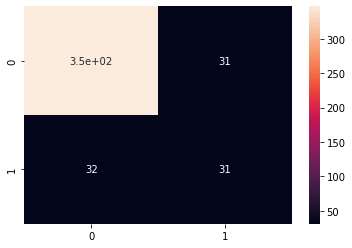

In [62]:
sns.heatmap(cm, annot=True)
pass

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       378
           1       0.50      0.49      0.50        63

    accuracy                           0.86       441
   macro avg       0.71      0.71      0.71       441
weighted avg       0.86      0.86      0.86       441



# Salvando o classificador

In [64]:
import pickle

In [65]:
with open('VariaveisModelo.pkl', 'wb') as f:
    pickle.dump([scaler, onehotencoder, logistic], f)

### Vamos considerar um exemplo de uso

In [66]:
with open('VariaveisModelo.pkl', 'rb') as f:
    min_max, encoder, model = pickle.load(f)

In [67]:
min_max, encoder, model

(MinMaxScaler(), OneHotEncoder(), LogisticRegression())

In [68]:
X_novo = employee_df.iloc[0:1] #apenas para teste
X_novo

Age  Attrition BusinessTravel  DailyRate Department  DistanceFromHome  \
0   41          1  Travel_Rarely       1102      Sales                 1   

   Education EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2  Life Sciences                        2  Female          94   

   JobInvolvement  JobLevel          JobRole  JobSatisfaction MaritalStatus  \
0               3         2  Sales Executive                4        Single   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0           5993        19479                   8         1   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5

In [69]:
X_cat_novo = X_novo[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [70]:
X_cat_novo = encoder.transform(X_cat_novo).toarray()

In [71]:
X_cat_novo = pd.DataFrame(X_cat_novo)

In [72]:
X_numerical_novo = X_novo[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]

In [73]:
X_all_novo = pd.concat([X_cat_novo, X_numerical_novo], axis = 1)

In [74]:
X_novo = min_max.transform(X_all_novo)

D:\Programas\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [75]:
model.predict(X_novo)

array([1], dtype=int64)

In [76]:
model.predict_proba(X_novo)

array([[0.36648486, 0.63351514]])

In [77]:
model.classes_

array([0, 1], dtype=int64)